## 작업1. 폴더명을 두개의 변수로 나누기
- color 변수 출력=> ['balck','bule', 'brown', 'gren', 'red', 'white']
- category 변수 출력=> ['dress', 'pants', 'shirt','shoes', 'shorts']
- 작업순서
    - 1번: blac_dress, black_pants 등의 폴더명이 나오게 리스트를 한다.
    - 2번: 그 리스트의 0번자료를 읽어서  'black' 과 'dress' 두 개의 글자로 나뉘게 한다.
    - 3번: 1번과 2번을 for로 돌려서 color, category 변수에 append한다.
    - 4번: color와 category의 변수를 중복제거한다.


In [11]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [15]:


folderName='clothes_dataset'
splitVar='_'
folder='./' + folderName +'/'
folderList=os.listdir(folder)

itemList=[x.split(splitVar) for x in folderList]
itemList=np.array(itemList)

item=[list(set(itemList[:,x])) for x in range(np.shape(itemList)[1])]
item

[['brown', 'white', 'red', 'black', 'green', 'blue'],
 ['dress', 'shirt', 'shorts', 'shoes', 'pants']]

## 작업2. x,y 데이터를 제작
- x값은 이미지 데이터를 읽어서 180,180 으로 변경한뒤 array화하고
- y값은 color와 category를 읽어서  멀티로 array화함
    -예) black_pants ==>  [0,1]      bule_shirt ==> [1,2]


In [24]:
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
folderName='clothes_dataset'
folderList=glob('./' + folderName + '/*')
x,y=[],[]

for folder in folderList:
    
    ### 폴더명의 마지막 black_dress 만 읽어서 black와 dress를 분리하는 작업
    folderName=folder.split('\\')[-1]
    tmp1=folderName.split('_')[0]
    tmp2=folderName.split('_')[1]
    
    
    fileList=glob(folder + '/*.jpg')
    
    
    print('▶ Start:' + folder)
    for file in fileList:
        img=Image.open(file)
        img=img.resize((180,180))
        imgArr=np.array(img)
        x.append(imgArr)
        
        y.append([])
        y[-1].append(item[0].index(tmp1))
        y[-1].append(item[1].index(tmp2))
        
    

▶ Start:./clothes_dataset\black_dress
▶ Start:./clothes_dataset\black_pants
▶ Start:./clothes_dataset\black_shirt
▶ Start:./clothes_dataset\black_shoes
▶ Start:./clothes_dataset\black_shorts
▶ Start:./clothes_dataset\blue_dress
▶ Start:./clothes_dataset\blue_pants
▶ Start:./clothes_dataset\blue_shirt
▶ Start:./clothes_dataset\blue_shoes
▶ Start:./clothes_dataset\blue_shorts
▶ Start:./clothes_dataset\brown_pants
▶ Start:./clothes_dataset\brown_shoes
▶ Start:./clothes_dataset\brown_shorts
▶ Start:./clothes_dataset\green_pants
▶ Start:./clothes_dataset\green_shirt
▶ Start:./clothes_dataset\green_shoes
▶ Start:./clothes_dataset\green_shorts
▶ Start:./clothes_dataset\red_dress
▶ Start:./clothes_dataset\red_pants
▶ Start:./clothes_dataset\red_shoes
▶ Start:./clothes_dataset\white_dress
▶ Start:./clothes_dataset\white_pants
▶ Start:./clothes_dataset\white_shoes
▶ Start:./clothes_dataset\white_shorts


In [25]:
np.shape(x),np.shape(y)

((11385, 180, 180, 3), (11385, 2))

In [26]:
y[0]    # 첫번째 옷의색상은 3번, 옷의종류는 0번이라는 뜻

[3, 0]

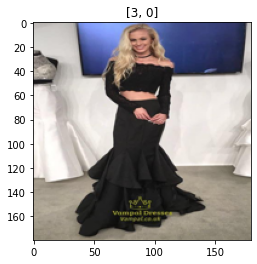

('black', 'dress')

In [30]:
# 샘플출력
num=5
plt.imshow(x[num])
title=y[num]
plt.title(title)
plt.show()


colorLabel=y[num][0]     # [3,0]  에서 3
categoryLabel=y[num][1] # [3,0]  에서 0

item[0][colorLabel],item[1][categoryLabel]



In [38]:
np.savez('cloths_multi_label.npz', Xdata=x, Ydata=y)

In [46]:
### json 저장시에는 딕셔너리 구조로 저장함

class_name=dict({'color_className':item[0],
         'category_className':item[1]})

import json
file_path = "./cloths_mulit_label.json"
with open(file_path, 'w') as outfile:
    json.dump(class_name, outfile)

### 데이터셋이 제공되었을때는 위의 작업 없다고 가정하고

In [39]:
import numpy as np
data=np.load('cloths_multi_label.npz')
list(data)

['Xdata', 'Ydata']

In [41]:
Xdata=data['Xdata']
Ydata=data['Ydata']

[[3 0]
 [3 4]
 [3 4]
 [3 4]]
[3 0]
[3 4]
[3 4]
[3 4]


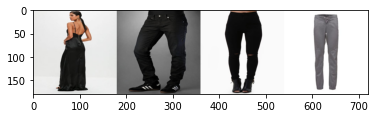

In [47]:
### 샘플로 출력하여 봅니다.

plt.imshow(np.hstack(Xdata[449:453]))
print(Ydata[449:453])

for x in range(449,453):
    print(Ydata[x])

In [50]:
import json

file_path = "./cloths_mulit_label.json"
with open(file_path, "r") as json_file:
    json_data = json.load(json_file)
json_data

{'color_className': ['brown', 'white', 'red', 'black', 'green', 'blue'],
 'category_className': ['dress', 'shirt', 'shorts', 'shoes', 'pants']}

[[3 0]
 [3 4]
 [3 4]
 [3 4]]
black_dress
black_pants
black_pants
black_pants


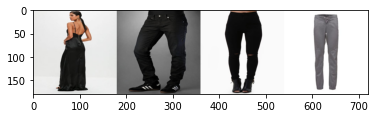

In [52]:
### 샘플로 출력하여 봅니다.

plt.imshow(np.hstack(Xdata[449:453]))
print(Ydata[449:453])

for x in range(449,453):
    colorLabel=Ydata[x][0]
    categoryLabel=Ydata[x][1]
    print(json_data['color_className'][colorLabel]+ '_' + json_data['category_className'][categoryLabel])